In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df2=df.copy()

In [6]:
df2["Age"]=df2["Age"].fillna(df2.groupby("Sex")["Age"].transform("mean"))
df2["Age"]=df2["Age"].fillna(df2["Age"].mean())

In [7]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X=df2[["Pclass","Age","SibSp","Parch","Fare"]]
Y=df2["Survived"]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)
log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")


In [10]:
log_reg.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr')

In [11]:
train_accuracy = log_reg.score(X_train, Y_train)
test_accuracy = log_reg.score(X_test, Y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.71
Accuracy on Test Data  : 0.69


In [12]:
log_reg_mnm = LogisticRegression(solver='lbfgs', multi_class="multinomial")
log_reg_mnm.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [13]:
train_accuracy = log_reg_mnm.score(X_train, Y_train)
test_accuracy = log_reg_mnm.score(X_test, Y_test)

print('Multinomial', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial
------------------------------
Accuracy on Train Data : 0.70
Accuracy on Test Data  : 0.69


In [14]:
df3= pd.concat([df2, pd.get_dummies(df2["Sex"], drop_first=True,prefix="is")], axis=1)
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
X2=df3[["Pclass","is_male","Age","SibSp","Parch","Fare"]]
Y2=df3["Survived"]

In [16]:
X2_train, X2_test, Y2_train, Y2_test =  train_test_split(X2, Y2, test_size=0.20, random_state=111)
log_reg2 = LogisticRegression(solver='lbfgs', multi_class="ovr")
log_reg2.fit(X2_train, Y2_train)

LogisticRegression(multi_class='ovr')

In [17]:
train_accuracy = log_reg2.score(X2_train, Y2_train)
test_accuracy = log_reg2.score(X2_test, Y2_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.80
Accuracy on Test Data  : 0.78


In [20]:
train_prediction = log_reg2.predict(X2_train)
test_prediction = log_reg2.predict(X2_test)

test_prediction_probability = log_reg2.predict_proba(X2_test)[:,1]

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(Y2_train, train_prediction)
confusion_matrix_test = confusion_matrix(Y2_test, test_prediction)

In [ ]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

In [24]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 94
True positive amount  : 45
False positive amount : 19
False negative amount : 21


## 1. Accuracy

In [25]:
from sklearn.metrics import accuracy_score

print("Accuracy value by the model   : ",  log_reg2.score(X2_test, Y2_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(Y2_test, test_prediction))

Accuracy value by the model   :  0.776536312849162
Calculated accuracy value     :  0.776536312849162
accuracy_score() value        :  0.776536312849162


## 2. Error Rate

In [26]:
print("Error Rate    : ", (1-log_reg2.score(X2_test, Y2_test)))

Error Rate    :  0.22346368715083798


## 3. Precision

In [27]:
from sklearn.metrics import precision_score

print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(Y2_test, test_prediction))

Calculated precision value   :  0.703125
precision_score() value      :  0.703125


## 4. Recall

In [28]:
from sklearn.metrics import recall_score

print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(Y2_test, test_prediction))

Calculated recall value   :  0.6818181818181818
recall_score() value      :  0.6818181818181818


## 5. Specificity

In [29]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.831858407079646


## 6. F1 Score

In [31]:
from sklearn.metrics import f1_score

precision = precision_score(Y2_test, test_prediction)
recall = recall_score(Y2_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(Y2_test, test_prediction))

Calculated F1 score  :  0.6923076923076923
f1_score() value     :  0.6923076923076923


In [32]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(Y2_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(Y2_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(Y2_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(Y2_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(Y2_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       113
           1       0.70      0.68      0.69        66

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

f1_score() value        : 0.69
recall_score() value    : 0.68
precision_score() value : 0.70


Precision  : [0.8173913 0.703125 ]
Recall     : [0.83185841 0.68181818]
F1 Score   : [0.8245614  0.69230769]


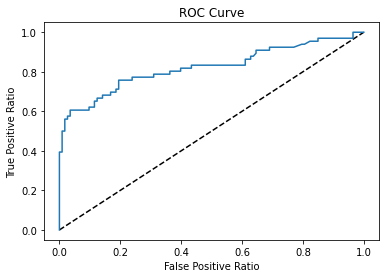

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(Y2_test, test_prediction_probability)

import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [36]:
print('AUC value : ', roc_auc_score(Y2_test, test_prediction_probability))

AUC value :  0.8226065969428801


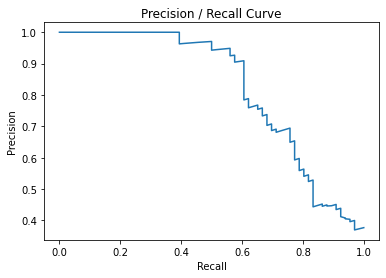

In [37]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(Y2_test, test_prediction_probability)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

In [39]:
from sklearn.metrics import log_loss

print("Logarithmic Loss (log-loss) : " , log_loss(Y2_test, test_prediction_probability))
print("Error Rate                  : " , 1- accuracy_score(Y2_test, test_prediction))

Logarithmic Loss (log-loss) :  0.4701994595909477
Error Rate                  :  0.22346368715083798
